The aim of this research is to quantify the accessibility challenges faced by old craft communities in Bangkok by analyzing the network of train stops by calculate both Euclidean and network distances between the craft communities and train stops to understand commuting difficulties and propose potential improvements.

In [3]:
pip install geopandas pyogrio numpy matplotlib shapely pandas requests networkx osmnx h3 libpysal


Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd
import pyogrio as ogr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point, Polygon
import pandas as pd
import requests
import networkx as nx
import osmnx as ox
import h3
import libpysal as lps


In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from geopy.distance import geodesic

# Correct file paths
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)


In [6]:
# Inspect data
print(craft_communities_gdf.head())
print(train_stops_gdf.head())


   ID         Name                                        Description  \
0   1   Talad Noi   The prominence in craftsmanship and skilled wo...   
1   2     Pahurat   The historic commercial district of Pahurat in...   
2   3   Kudee Jeen  This community is characterized by its harmoni...   
3   4  Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
4   5       Ban Bu  This community, with a history of over 200 yea...   

    Country Province                    geometry  
0  Thailand  Bangkok  POINT (100.51311 13.73333)  
1  Thailand  Bangkok  POINT (100.49953 13.74454)  
2  Thailand  Bangkok  POINT (100.47936 13.73173)  
3  Thailand  Bangkok  POINT (100.51214 13.75926)  
4  Thailand  Bangkok  POINT (100.47893 13.76234)  
   ID  Name Description Country Province id_station  id_train  \
0 NaN  None        None    None     None       None       1.0   
1 NaN  None        None    None     None       None       2.0   
2 NaN  None        None    None     None       None       3.

In [7]:
# Check if the coordinates are within the valid range
def check_coordinates(gdf):
    for coord in gdf.geometry:
        if not (-90 <= coord.y <= 90 and -180 <= coord.x <= 180):
            print(f"Invalid coordinate found: {coord}")

# Check coordinates for both datasets
check_coordinates(train_stops_gdf)
check_coordinates(craft_communities_gdf)


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


Error calculating distance between (100.547331, 13.753861) and (100.547331, 13.753861): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.782358, 13.72825): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.589527, 13.744355): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.748542, 13.727534): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.63976, 13.738422): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.526297, 13.758584): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.533204, 13.757032): Latitude must be in the [-90; 90] range.
Error calculating distance between (100.547331, 13.753861) and (100.564136, 13.750031): Latitude mu

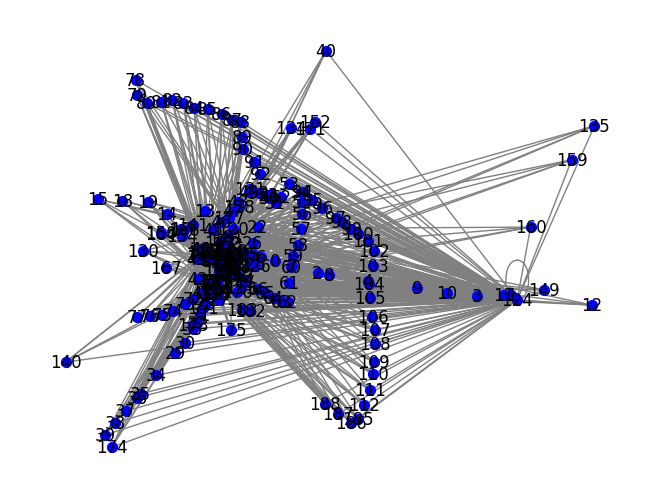

In [8]:
# Create a network graph from train stops
G = nx.Graph()
train_stops_coords = [(point.x, point.y) for point in train_stops_gdf.geometry if -90 <= point.y <= 90 and -180 <= point.x <= 180]

# Add nodes to the graph
for idx, coord in enumerate(train_stops_coords):
    G.add_node(idx, pos=coord)

# Add edges to the graph based on proximity
k = 5
for i, stop in enumerate(train_stops_coords):
    distances = []
    for other_stop in train_stops_coords:
        try:
            distances.append(geodesic(stop, other_stop).meters)
        except ValueError as e:
            print(f"Error calculating distance between {stop} and {other_stop}: {e}")
            distances.append(float('inf'))
    nearest_stops = np.argsort(distances)[1:k+1]  # Exclude itself
    for neighbor in nearest_stops:
        G.add_edge(i, neighbor, weight=distances[neighbor])

# Draw the network graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=50, edge_color='gray')
plt.show()


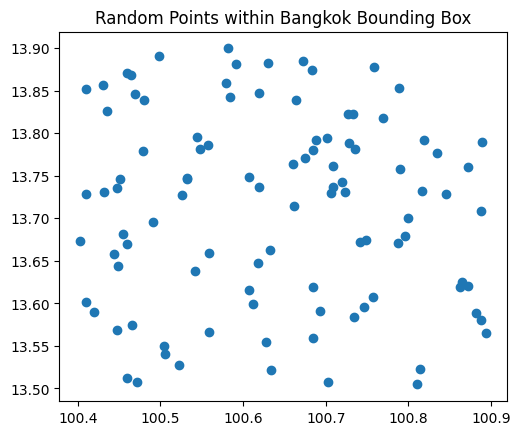

In [9]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bounding box for Bangkok
bbox = (100.4, 13.5, 100.9, 13.9)

# Create a GeoDataFrame of 100 random points within the bounding box
np.random.seed(0)
n = 100
df = pd.DataFrame(
    {
        "geometry": gpd.points_from_xy(
            np.random.uniform(bbox[0], bbox[2], n),
            np.random.uniform(bbox[1], bbox[3], n),
        ),
    }
)

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")
gdf.plot()
plt.title("Random Points within Bangkok Bounding Box")
plt.show()


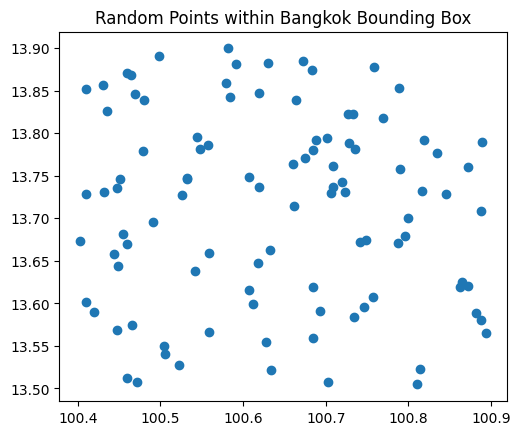

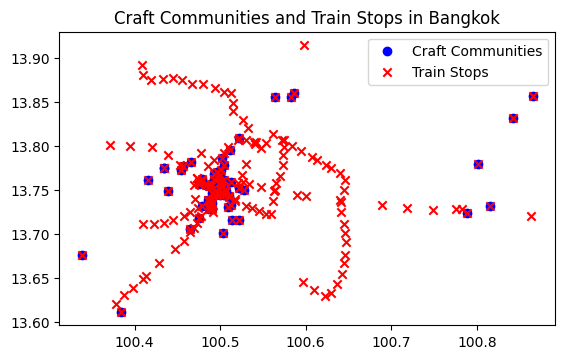

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_58326/2419356256.py:44: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]


   ID         Name                                        Description  \
0   1   Talad Noi   The prominence in craftsmanship and skilled wo...   
1   2     Pahurat   The historic commercial district of Pahurat in...   
2   3   Kudee Jeen  This community is characterized by its harmoni...   
3   4  Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
4   5       Ban Bu  This community, with a history of over 200 yea...   

    Country Province                    geometry  \
0  Thailand  Bangkok  POINT (100.51311 13.73333)   
1  Thailand  Bangkok  POINT (100.49953 13.74454)   
2  Thailand  Bangkok  POINT (100.47936 13.73173)   
3  Thailand  Bangkok  POINT (100.51214 13.75926)   
4  Thailand  Bangkok  POINT (100.47893 13.76234)   

                                           neighbors  
0  [63, 29, 44, 45, 70, 1, 19, 69, 34, 15, 13, 49...  
1  [34, 44, 49, 71, 45, 5, 19, 29, 43, 50, 10, 35...  
2  [57, 9, 42, 32, 48, 26, 12, 23, 35, 24, 10, 38...  
3  [16, 56, 19, 45, 52, 50, 

In [15]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bounding box for Bangkok
bbox = (100.4, 13.5, 100.9, 13.9)

# Create a GeoDataFrame of 100 random points within the bounding box
np.random.seed(0)
n = 100
df = pd.DataFrame(
    {
        "geometry": gpd.points_from_xy(
            np.random.uniform(bbox[0], bbox[2], n),
            np.random.uniform(bbox[1], bbox[3], n),
        ),
    }
)

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")
gdf.plot()
plt.title("Random Points within Bangkok Bounding Box")
plt.show()

# Load GeoJSON files
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Plot the data
fig, ax = plt.subplots()
craft_communities_gdf.plot(ax=ax, color='blue', marker='o', label='Craft Communities')
train_stops_gdf.plot(ax=ax, color='red', marker='x', label='Train Stops')
plt.legend()
plt.title("Craft Communities and Train Stops in Bangkok")
plt.show()

# Find five nearest neighbors for each craft community, not including itself
k = 20
neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]

# Join neighbors to the original dataframe
craft_communities_gdf["neighbors"] = neighbors.tolist()
print(craft_communities_gdf.head())


In [15]:
gdf

geometry
0   POINT (100.67441 13.77113)
1   POINT (100.75759 13.60800)
2   POINT (100.70138 13.79408)
3   POINT (100.67244 13.88488)
4   POINT (100.61183 13.59950)
..                         ...
95  POINT (100.49160 13.69618)
96  POINT (100.69326 13.59097)
97  POINT (100.41005 13.60174)
98  POINT (100.81447 13.52321)
99  POINT (100.40235 13.67377)

[100 rows x 1 columns]

In [11]:
def create_lines(r):
    lines = []
    for i, neighbor in enumerate(r.neighbors):
        lines.append(LineString([r.geometry, gdf.loc[neighbor].geometry]))
    return MultiLineString(lines)

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString
import numpy as np

# Load the GeoJSON file for craft communities
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')

# Print the first few rows to examine the structure and columns
print(craft_communities_gdf.head())


   ID         Name                                        Description  \
0   1   Talad Noi   The prominence in craftsmanship and skilled wo...   
1   2     Pahurat   The historic commercial district of Pahurat in...   
2   3   Kudee Jeen  This community is characterized by its harmoni...   
3   4  Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
4   5       Ban Bu  This community, with a history of over 200 yea...   

    Country Province                    geometry  
0  Thailand  Bangkok  POINT (100.51311 13.73333)  
1  Thailand  Bangkok  POINT (100.49953 13.74454)  
2  Thailand  Bangkok  POINT (100.47936 13.73173)  
3  Thailand  Bangkok  POINT (100.51214 13.75926)  
4  Thailand  Bangkok  POINT (100.47893 13.76234)  


In [14]:

# Find five nearest neighbors for each craft community, not including itself
k = 20
neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]

# Join neighbors to the original dataframe
craft_communities_gdf["neighbors"] = neighbors.tolist()
print(craft_communities_gdf.head())

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_58326/1174292929.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]


   ID         Name                                        Description  \
0   1   Talad Noi   The prominence in craftsmanship and skilled wo...   
1   2     Pahurat   The historic commercial district of Pahurat in...   
2   3   Kudee Jeen  This community is characterized by its harmoni...   
3   4  Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
4   5       Ban Bu  This community, with a history of over 200 yea...   

    Country Province                    geometry  \
0  Thailand  Bangkok  POINT (100.51311 13.73333)   
1  Thailand  Bangkok  POINT (100.49953 13.74454)   
2  Thailand  Bangkok  POINT (100.47936 13.73173)   
3  Thailand  Bangkok  POINT (100.51214 13.75926)   
4  Thailand  Bangkok  POINT (100.47893 13.76234)   

                                           neighbors  
0  [63, 29, 44, 45, 70, 1, 19, 69, 34, 15, 13, 49...  
1  [34, 44, 49, 71, 45, 5, 19, 29, 43, 50, 10, 35...  
2  [57, 9, 42, 32, 48, 26, 12, 23, 35, 24, 10, 38...  
3  [16, 56, 19, 45, 52, 50, 

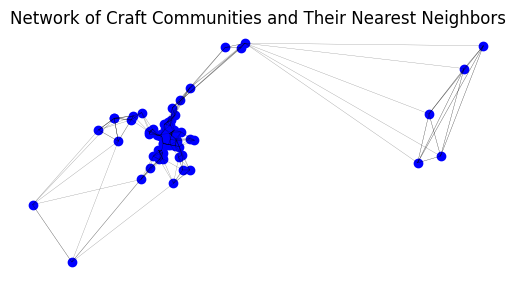

In [20]:
# Function to create lines between a point and its neighbors
def create_lines(row, gdf):
    lines = []
    for neighbor_idx in row['neighbors']:
        neighbor_point = gdf.iloc[neighbor_idx].geometry
        lines.append(LineString([row.geometry, neighbor_point]))
    return MultiLineString(lines)

# Create lines between each point and its neighbors
craft_communities_gdf['line_geometry'] = craft_communities_gdf.apply(create_lines, gdf=craft_communities_gdf, axis=1)
lines_gdf = gpd.GeoDataFrame(
    craft_communities_gdf[['line_geometry']], geometry='line_geometry', crs='EPSG:4326'
)

# Plot the lines
ax = lines_gdf.plot(color='black', alpha=0.5, linewidth=0.2)
craft_communities_gdf.plot(ax=ax, color='blue', marker='o', label='Craft Communities').set_axis_off()
plt.title("Network of Craft Communities and Their Nearest Neighbors")
plt.savefig("lines.pdf", bbox_inches="tight", pad_inches=0)
plt.show()


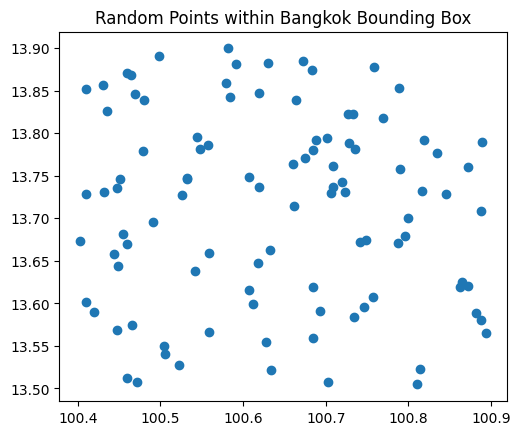

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/3672828603.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]


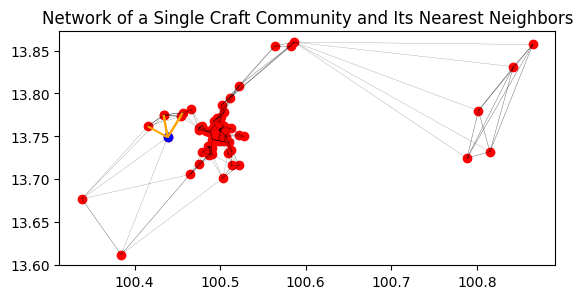

In [21]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString

# Define bounding box for Bangkok
bbox = (100.4, 13.5, 100.9, 13.9)

# Create a GeoDataFrame of 100 random points within the bounding box
np.random.seed(0)
n = 100
df = pd.DataFrame(
    {
        "geometry": gpd.points_from_xy(
            np.random.uniform(bbox[0], bbox[2], n),
            np.random.uniform(bbox[1], bbox[3], n),
        ),
    }
)

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")
gdf.plot()
plt.title("Random Points within Bangkok Bounding Box")
plt.show()

# Load GeoJSON files
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Find five nearest neighbors for each craft community, not including itself
k = 5
neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]

# Join neighbors to the original dataframe
craft_communities_gdf["neighbors"] = neighbors.tolist()

# Function to create lines between a point and its neighbors
def create_lines(row, gdf):
    lines = []
    for neighbor_idx in row['neighbors']:
        neighbor_point = gdf.iloc[neighbor_idx].geometry
        lines.append(LineString([row.geometry, neighbor_point]))
    return MultiLineString(lines)

# Create lines between each point and its neighbors
craft_communities_gdf['line_geometry'] = craft_communities_gdf.apply(create_lines, gdf=craft_communities_gdf, axis=1)
lines_gdf = gpd.GeoDataFrame(
    craft_communities_gdf[['line_geometry']], geometry='line_geometry', crs='EPSG:4326'
)

# Plot the lines for a single point
s = craft_communities_gdf.sample(1)
ax = lines_gdf.plot(color="black", alpha=0.5, linewidth=0.2)
craft_communities_gdf.plot(ax=ax, color="red")
s.plot(ax=ax, color="blue")
gpd.GeoSeries(s.line_geometry).plot(ax=plt.gca(), color="orange")

plt.title("Network of a Single Craft Community and Its Nearest Neighbors")
plt.show()


In [23]:
import geopandas as gpd

# Load GeoJSON files
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Inspect the columns of the train stops GeoDataFrame
print(train_stops_gdf.columns)


Index(['ID', 'Name', 'Description', 'Country', 'Province', 'id_station',
       'id_train', 'name', 'location', 'id_mrtline', 'mrtline', 'route',
       'station_co', 'type_id', 'type_name', 'dcode', 'dname', 'geometry'],
      dtype='object')


Index(['ID', 'Name', 'Description', 'Country', 'Province', 'id_station',
       'id_train', 'name', 'location', 'id_mrtline', 'mrtline', 'route',
       'station_co', 'type_id', 'type_name', 'dcode', 'dname', 'geometry'],
      dtype='object')


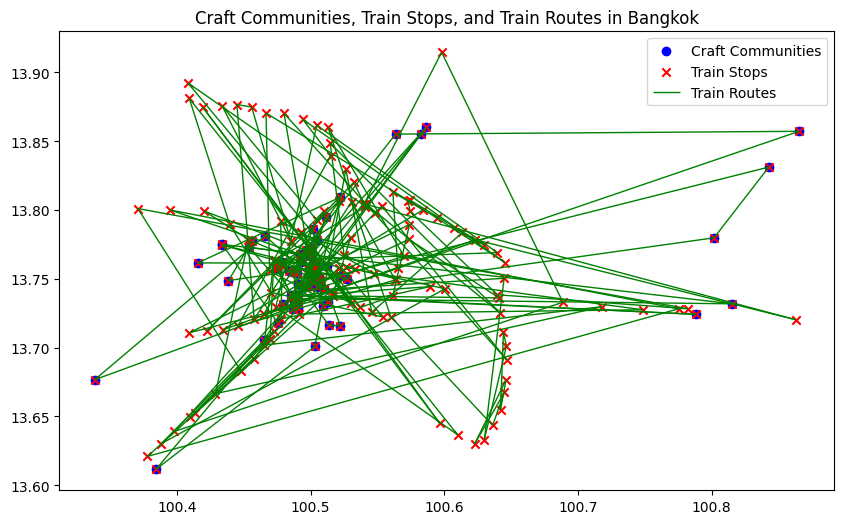

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import numpy as np

# Load GeoJSON files
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Print columns to identify the appropriate column for sorting
print(train_stops_gdf.columns)

# Use a correct column for sorting (e.g., 'name' or another identifier)
sort_column = 'name'  # Adjust this based on the correct column name

# Create LineStrings between consecutive train stops to form routes
train_stops_gdf = train_stops_gdf.sort_values(by=sort_column)  # Ensure train stops are in order
train_routes = []
for i in range(len(train_stops_gdf) - 1):
    line = LineString([train_stops_gdf.iloc[i].geometry, train_stops_gdf.iloc[i + 1].geometry])
    train_routes.append(line)

routes_gdf = gpd.GeoDataFrame(geometry=train_routes, crs="EPSG:4326")

# Plot the craft communities, train stops, and train routes
fig, ax = plt.subplots(figsize=(10, 10))
craft_communities_gdf.plot(ax=ax, color='blue', marker='o', label='Craft Communities')
train_stops_gdf.plot(ax=ax, color='red', marker='x', label='Train Stops')
routes_gdf.plot(ax=ax, color='green', linewidth=1, label='Train Routes')
plt.legend()
plt.title("Craft Communities, Train Stops, and Train Routes in Bangkok")
plt.show()


/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/1196604809.py:18: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  network = ox.graph_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], network_type='walk')


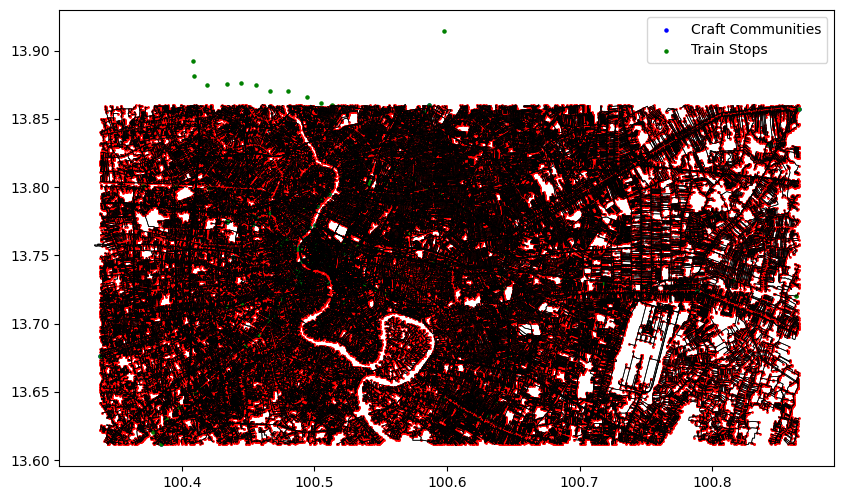

In [26]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Load GeoJSON files
craft_communities_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson')
train_stops_gdf = gpd.read_file('/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson')

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Bounding box for the area of interest
bbox = craft_communities_gdf.total_bounds

# Create a network graph for the area of interest
network = ox.graph_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], network_type='walk')

# Convert network to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(network)

# Plot the network
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.5, edgecolor='black')
nodes.plot(ax=ax, color='red', markersize=1)
craft_communities_gdf.plot(ax=ax, color='blue', markersize=5, label='Craft Communities')
train_stops_gdf.plot(ax=ax, color='green', markersize=5, label='Train Stops')
plt.legend()
plt.show()


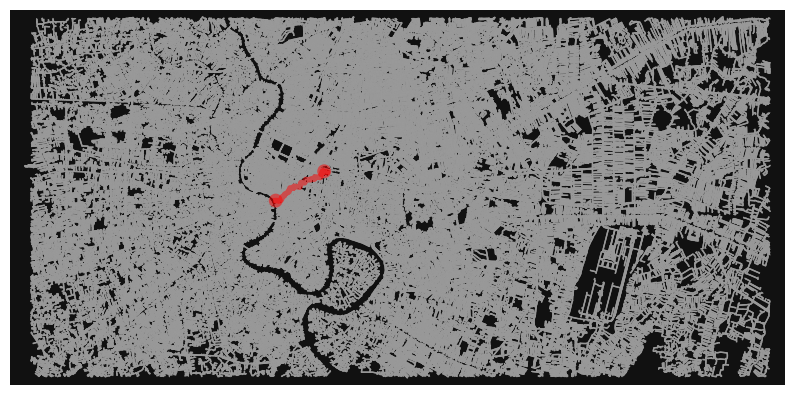

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/4127399703.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


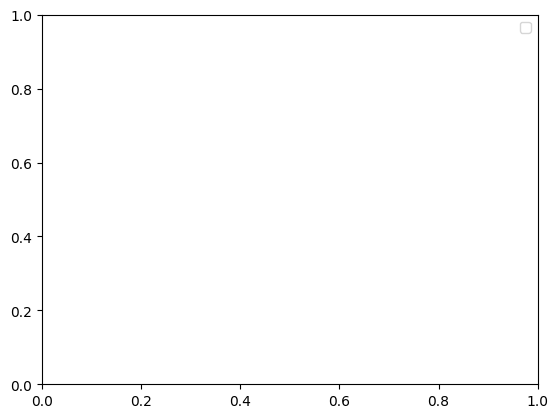

In [27]:
# Assuming we are finding the shortest path between the first craft community and the first train stop
orig = ox.distance.nearest_nodes(network, X=craft_communities_gdf.geometry.x[0], Y=craft_communities_gdf.geometry.y[0])
dest = ox.distance.nearest_nodes(network, X=train_stops_gdf.geometry.x[0], Y=train_stops_gdf.geometry.y[0])

# Find the shortest path
route = ox.shortest_path(network, orig, dest, weight='length')

# Plot the shortest path
fig, ax = ox.plot_graph_route(network, route, node_size=0, figsize=(10, 10))
craft_communities_gdf.plot(ax=ax, color='blue', markersize=5, label='Craft Communities')
train_stops_gdf.plot(ax=ax, color='green', markersize=5, label='Train Stops')
plt.legend()
plt.show()


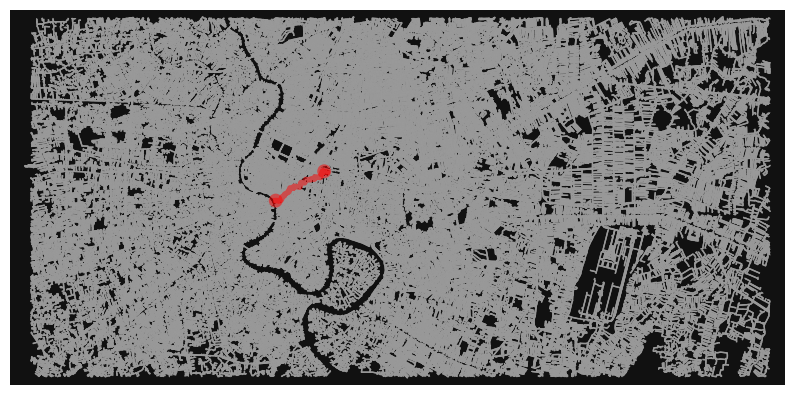

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/2198128711.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


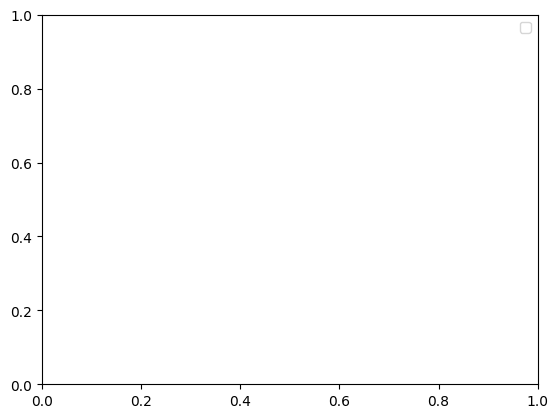

In [28]:
# Assuming we are finding the shortest path between the first craft community and the first train stop
orig = ox.distance.nearest_nodes(network, X=craft_communities_gdf.geometry.x[0], Y=craft_communities_gdf.geometry.y[0])
dest = ox.distance.nearest_nodes(network, X=train_stops_gdf.geometry.x[0], Y=train_stops_gdf.geometry.y[0])

# Find the shortest path
route = ox.shortest_path(network, orig, dest, weight='length')

# Plot the shortest path
fig, ax = ox.plot_graph_route(network, route, node_size=0, figsize=(10, 10))
craft_communities_gdf.plot(ax=ax, color='blue', markersize=5, label='Craft Communities')
train_stops_gdf.plot(ax=ax, color='green', markersize=5, label='Train Stops')
plt.legend()
plt.show()



In [29]:
pip install h3 libpysal networkx osmnx


Note: you may need to restart the kernel to use updated packages.


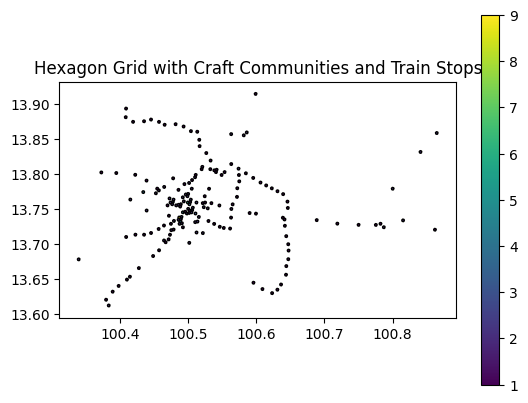

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/3184401627.py:43: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = lps.weights.Queen.from_dataframe(hex_gdf)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 138 disconnected components.
 There are 123 islands with ids: 2, 6, 9, 13, 14, 15, 18, 20, 22, 23, 25, 27, 30, 31, 32, 33, 35, 37, 42, 43, 44, 48, 49, 51, 52, 54, 59, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 125, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 157, 158, 159, 16

NodeNotFound: Either source 8964a4b154fffff or target 8964a4b1657ffff is not in G

In [30]:
import geopandas as gpd
import h3
import libpysal as lps
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon, LineString
from h3 import h3

# Load the datasets
craft_communities_gdf = gpd.read_file("/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson")
train_stops_gdf = gpd.read_file("/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson")

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Function to get H3 hexagon for a point
def get_hexagon(point, resolution=9):
    return h3.geo_to_h3(point.y, point.x, resolution)

# Apply H3 hexagon function to both datasets
craft_communities_gdf['hex'] = craft_communities_gdf.geometry.apply(get_hexagon)
train_stops_gdf['hex'] = train_stops_gdf.geometry.apply(get_hexagon)

# Combine both datasets for hexagon counting
combined_gdf = pd.concat([craft_communities_gdf[['hex']], train_stops_gdf[['hex']]])

# Count the number of points in each hexagon
hex_counts = combined_gdf['hex'].value_counts().reset_index()
hex_counts.columns = ['hex', 'count']

# Create a GeoDataFrame of hexagons
hex_geometries = hex_counts['hex'].apply(lambda x: Polygon(h3.h3_to_geo_boundary(x, geo_json=True)))
hex_gdf = gpd.GeoDataFrame(hex_counts, geometry=hex_geometries, crs="EPSG:4326")

# Plot the hexagons with counts
hex_gdf.plot(column='count', cmap='viridis', edgecolor='k', legend=True)
plt.title('Hexagon Grid with Craft Communities and Train Stops')
plt.show()

# Build network with hexagons as nodes and their adjacency as edges
W = lps.weights.Queen.from_dataframe(hex_gdf)
G = nx.Graph(W.to_networkx())

# Find the shortest path between hexagons
def shortest_path_hex(G, origin_hex, destination_hex):
    try:
        path = nx.shortest_path(G, origin_hex, destination_hex, weight='weight')
        return path
    except nx.NetworkXNoPath:
        return None

# Example usage
origin_hex = craft_communities_gdf['hex'].iloc[0]
destination_hex = train_stops_gdf['hex'].iloc[0]
shortest_path = shortest_path_hex(G, origin_hex, destination_hex)
print(f'Shortest path from {origin_hex} to {destination_hex}: {shortest_path}')

# Visualize the network and shortest path
pos = {node: h3.h3_to_geo(node) for node in G.nodes()}
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='grey')
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title('Network of Hexagons and Shortest Path')
plt.show()


Hexagon GeoDataFrame:
                hex  count                                           geometry
0  8964a4b1133ffff      9  POLYGON ((100.48868 13.73701, 100.48819 13.738...
1  8964a4b1317ffff      6  POLYGON ((100.50131 13.75834, 100.50081 13.760...
2  8964a4b1b73ffff      4  POLYGON ((100.43586 13.77325, 100.43536 13.775...
3  8964a4b138fffff      4  POLYGON ((100.50375 13.75587, 100.50326 13.757...
4  8964a4b1173ffff      4  POLYGON ((100.49403 13.74439, 100.49353 13.746...


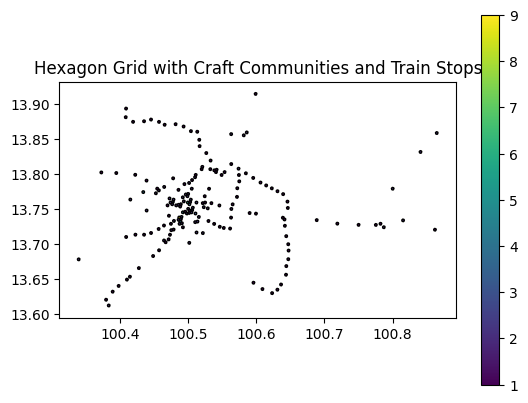

One or both of the hexagons 8964a4b154fffff, 8964a4b1657ffff are not in the graph
Shortest path from 8964a4b154fffff to 8964a4b1657ffff: None


/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_39202/516730287.py:50: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = lps.weights.Queen.from_dataframe(hex_gdf)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 138 disconnected components.
 There are 123 islands with ids: 2, 6, 9, 13, 14, 15, 18, 20, 22, 23, 25, 27, 30, 31, 32, 33, 35, 37, 42, 43, 44, 48, 49, 51, 52, 54, 59, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 125, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 157, 158, 159, 160

NetworkXError: Node 0 has no position.

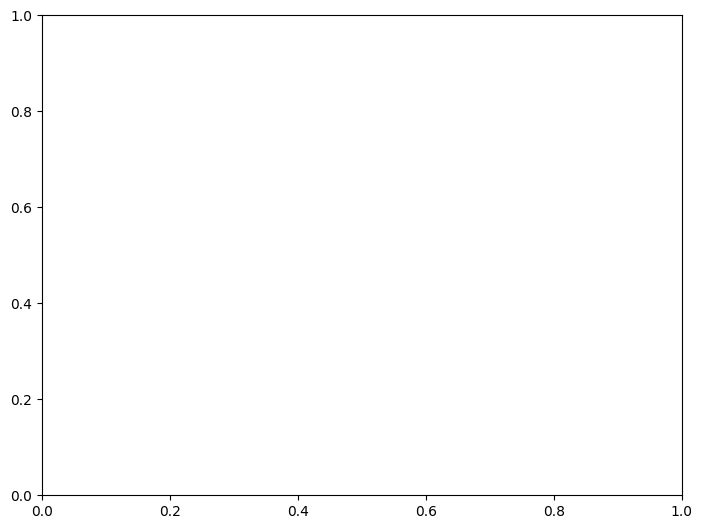

In [39]:
import geopandas as gpd
import h3
import libpysal as lps
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# Load the datasets
craft_communities_gdf = gpd.read_file("/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/old craft communities.geojson")
train_stops_gdf = gpd.read_file("/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/train_stops.geojson")

# Ensure both GeoDataFrames use the same coordinate system
craft_communities_gdf = craft_communities_gdf.to_crs(epsg=4326)
train_stops_gdf = train_stops_gdf.to_crs(epsg=4326)

# Function to get H3 hexagon for a point
def get_hexagon(point, resolution=9):
    return h3.geo_to_h3(point.y, point.x, resolution)

# Apply H3 hexagon function to both datasets
craft_communities_gdf['hex'] = craft_communities_gdf.geometry.apply(get_hexagon)
train_stops_gdf['hex'] = train_stops_gdf.geometry.apply(get_hexagon)

# Filter out invalid hexagons
craft_communities_gdf = craft_communities_gdf[craft_communities_gdf['hex'].apply(h3.h3_is_valid)]
train_stops_gdf = train_stops_gdf[train_stops_gdf['hex'].apply(h3.h3_is_valid)]

# Combine both datasets for hexagon counting
combined_gdf = pd.concat([craft_communities_gdf[['hex']], train_stops_gdf[['hex']]])

# Count the number of points in each hexagon
hex_counts = combined_gdf['hex'].value_counts().reset_index()
hex_counts.columns = ['hex', 'count']

# Create a GeoDataFrame of hexagons
hex_geometries = hex_counts['hex'].apply(lambda x: Polygon(h3.h3_to_geo_boundary(x, geo_json=True)))
hex_gdf = gpd.GeoDataFrame(hex_counts, geometry=hex_geometries, crs="EPSG:4326")

# Verify hexagon GeoDataFrame
print("Hexagon GeoDataFrame:\n", hex_gdf.head())

# Plot the hexagons with counts
fig, ax = plt.subplots()
hex_gdf.plot(column='count', cmap='viridis', edgecolor='k', legend=True, ax=ax)
plt.title('Hexagon Grid with Craft Communities and Train Stops')
plt.show()

# Build network with hexagons as nodes and their adjacency as edges
W = lps.weights.Queen.from_dataframe(hex_gdf)
G = nx.Graph(W.to_networkx())

# Find the shortest path between hexagons
def shortest_path_hex(G, origin_hex, destination_hex):
    if origin_hex in G and destination_hex in G:
        try:
            path = nx.shortest_path(G, origin_hex, destination_hex, weight=None)
            return path
        except nx.NetworkXNoPath:
            return None
    else:
        print(f"One or both of the hexagons {origin_hex}, {destination_hex} are not in the graph")
        return None

# Example usage
origin_hex = craft_communities_gdf['hex'].iloc[0]
destination_hex = train_stops_gdf['hex'].iloc[0]
shortest_path = shortest_path_hex(G, origin_hex, destination_hex)
print(f'Shortest path from {origin_hex} to {destination_hex}: {shortest_path}')

# Visualize the network and shortest path
valid_nodes = [node for node in G.nodes() if h3.h3_is_valid(node)]
pos = {node: h3.h3_to_geo(node) for node in valid_nodes}
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='grey')

if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title('Network of Hexagons and Shortest Path')
plt.show()


In [1]:
# Find 20 nearest neighbors for each craft community, not including itself
k = 20
neighbors = craft_communities_gdf.geometry.apply(lambda x: craft_communities_gdf.geometry.distance(x)).values.argsort(axis=1)[:, 1:k + 1]

# Join neighbors to the original dataframe
craft_communities_gdf["neighbors"] = neighbors.tolist()
print(craft_communities_gdf.head())

NameError: name 'craft_communities_gdf' is not defined

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_58326/2189642716.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = Point(data.geometry.centroid.x.mean(), data.geometry.centroid.y.mean())


Name                                        Description  \
3              Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
19                Ban bat   At the intersection of Meru Poon and Bamrung M...   
45            Ban Dok Mai   Another renowned artisan community in Phra Nak...   
15               Ban Krua   A historic Thai-Muslim community of Cham desce...   
16        Trok Ban Panthom  In the past, this community was known for prod...   
56             Ban Panthom  Area is known for its craftsmen specializing i...   
50           Pom Mahakarn   This group has been continuously settled for o...   
29            Chareonchai   Home to many valuable historic buildings and s...   
43  Troksilpa-Troktuekdin   It is an ancient community that still preserve...   
52      Trok Bawornrungsee  Currently renowned for gold leaf production bu...   
59         Tuekdin Mosque   An old Islamic neighborhood behind the Rajdamn...   
44                Luenrit   Uncovered ancient artifacts within the area, i...   
49       Ban Thongkamplew   This ancient gold leaf production community, d...   
55           Ban Teethong   A community of Lao people from Vientiane and L...   
13          Ban Krua Nhuer  The Chamu ethnic community, originally from Ca...   
1                 Pahurat   The historic commercial district of Pahurat in...   
40            Wat Sampraya  The Wat Sam Phraya community is renowned for i...   
34               Ban Mhor   Located next to Ban Lao, is a community of Vie...   
66       Yan Ta Praarthit   A popular area for foreign tourists in the Ban...   
0               Talad Noi   The prominence in craftsmanship and skilled wo...   

                      geometry  
3   POINT (100.51214 13.75926)  
19  POINT (100.50609 13.75130)  
45  POINT (100.50693 13.74920)  
15  POINT (100.52236 13.75175)  
16  POINT (100.50419 13.76145)  
56  POINT (100.50278 13.76020)  
50  POINT (100.50102 13.75556)  
29  POINT (100.50995 13.74266)  
43  POINT (100.50048 13.75537)  
52  POINT (100.50079 13.75879)  
59  POINT (100.50035 13.75837)  
44  POINT (100.50507 13.74378)  
49  POINT (100.49931 13.75075)  
55  POINT (100.49866 13.75733)  
13  POINT (100.52761 13.74987)  
1   POINT (100.49953 13.74454)  
40  POINT (100.49942 13.76664)  
34  POINT (100.49730 13.74487)  
66  POINT (100.49316 13.76228)  
0   POINT (100.51311 13.73333)

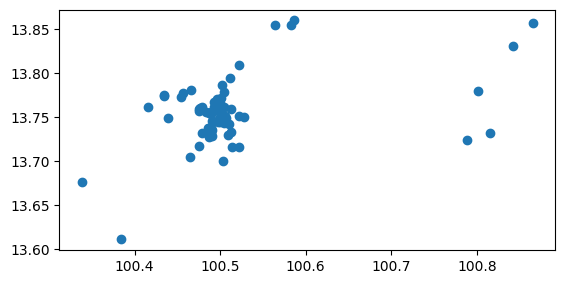

In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = '/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Assignments/Pear jansomwong/Assignment 1/old craft communities.geojson'
data = gpd.read_file(geojson_path)

# Ensure the geometries are in the correct format
data['geometry'] = data['geometry'].apply(lambda x: Point(x) if isinstance(x, tuple) else x)

# Plot the locations to visualize them
data.plot()

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Select the 20 nearest communities based on their geometric centroids
centroid = Point(data.geometry.centroid.x.mean(), data.geometry.centroid.y.mean())
data['distance_to_centroid'] = data.geometry.apply(lambda x: x.distance(centroid))
nearest_communities = data.nsmallest(20, 'distance_to_centroid')

# Display the selected communities
nearest_communities[['Name', 'Description', 'geometry']]


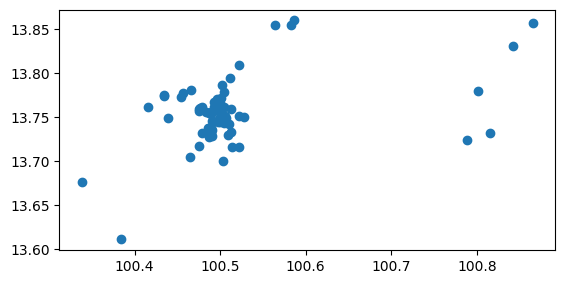

                      Name                                        Description  \
3              Narng Lerng  Ban Nang Loeng, also known as Ban E-Leng, deri...   
19                Ban bat   At the intersection of Meru Poon and Bamrung M...   
45            Ban Dok Mai   Another renowned artisan community in Phra Nak...   
15               Ban Krua   A historic Thai-Muslim community of Cham desce...   
16        Trok Ban Panthom  In the past, this community was known for prod...   
56             Ban Panthom  Area is known for its craftsmen specializing i...   
50           Pom Mahakarn   This group has been continuously settled for o...   
29            Chareonchai   Home to many valuable historic buildings and s...   
43  Troksilpa-Troktuekdin   It is an ancient community that still preserve...   
52      Trok Bawornrungsee  Currently renowned for gold leaf production bu...   
59         Tuekdin Mosque   An old Islamic neighborhood behind the Rajdamn...   
44                Luenrit   

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_58326/1751847661.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = Point(data.geometry.centroid.x.mean(), data.geometry.centroid.y.mean())


In [18]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Load the GeoJSON file
geojson_path = '/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Assignments/Pear jansomwong/Assignment 1/old craft communities.geojson'
data = gpd.read_file(geojson_path)

# Plot the locations to visualize them
data.plot()
plt.show()

# Ensure the geometries are in the correct format
data['geometry'] = data['geometry'].apply(lambda x: Point(x) if isinstance(x, tuple) else x)

# Select the 20 nearest communities based on their geometric centroids
centroid = Point(data.geometry.centroid.x.mean(), data.geometry.centroid.y.mean())
data['distance_to_centroid'] = data.geometry.apply(lambda x: x.distance(centroid))
nearest_communities = data.nsmallest(20, 'distance_to_centroid')

# Display the selected communities
print(nearest_communities[['Name', 'Description', 'geometry']])


# Function to plot an image at a specific location
def plot_image(ax, img_path, x, y):
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 10))
base = nearest_communities.plot(ax=ax, color='white', edgecolor='black')

# Path to images directory
images_dir = '/path/to/your/images/'

# Plot each community with its respective image
for idx, row in nearest_communities.iterrows():
    x, y = row['geometry'].x, row['geometry'].y
    img_path = os.path.join(images_dir, f'image{idx + 1}.jpg')  # Ensure image naming matches your images
    plot_image(ax, img_path, x, y)
    ax.text(x, y, row['Name'], fontsize=12, ha='right')

plt.show()
